In [230]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


In [231]:
file_path = "C:/Users/YourName/Downloads/Vaccination_Coverage_among_Young_Children__0-35_Months__20241125.csv"


In [232]:


# Correct file path
file_path = "C:/Users/Kerry Lam/Downloads/Vaccination_Coverage_among_Young_Children__0-35_Months__20241125.csv"
vaccination_data = pd.read_csv(file_path)

# Inspect the dataset
print(vaccination_data.head())


  Vaccine      Dose      Geography Type     Geography Birth Year/Birth Cohort  \
0    DTaP  ≥3 Doses  States/Local Areas  North Dakota                    2019   
1    DTaP  ≥3 Doses  States/Local Areas  North Dakota                    2018   
2    DTaP  ≥3 Doses  States/Local Areas  North Dakota               2018-2019   
3   Polio  ≥3 Doses  States/Local Areas  North Dakota                    2021   
4   Polio  ≥2 Doses  States/Local Areas  North Dakota                    2021   

  Dimension Type  Dimension  Estimate (%)    95% CI (%)  Sample Size  
0            Age  19 Months          93.5  88.0 to 96.6        263.0  
1            Age  19 Months          95.2  91.0 to 97.5        293.0  
2            Age  19 Months          91.8  88.3 to 94.3        556.0  
3            Age  19 Months          89.4  81.9 to 94.1        143.0  
4            Age   5 Months          79.3  69.0 to 86.8        143.0  


In [233]:
df = pd.read_csv("Datasets/Vaccination_Coverage_among_Young_Children__0-35_Months__20241101.csv")

In [234]:
# Define the state-to-region mapping for the 9 census regions
state_to_region = {
    # Middle Atlantic
    'New York': 'Middle Atlantic', 'NY-Rest of state': 'Middle Atlantic', 'NY-City of New York': 'Middle Atlantic', 
    'New Jersey': 'Middle Atlantic', 'Pennsylvania': 'Middle Atlantic', 
    'PA-Philadelphia': 'Middle Atlantic', 'PA-Rest of state': 'Middle Atlantic',

    # New England
    'Vermont': 'New England', 'New Hampshire': 'New England', 'Massachusetts': 'New England', 
    'Connecticut': 'New England', 'Rhode Island': 'New England', 'Maine': 'New England',

    # East North Central
    'Indiana': 'East North Central', 'Illinois': 'East North Central', 'Michigan': 'East North Central', 
    'Ohio': 'East North Central', 'Wisconsin': 'East North Central', 
    'IL-City of Chicago': 'East North Central', 'IL-Rest of state': 'East North Central',

    # West North Central
    'Iowa': 'West North Central', 'Kansas': 'West North Central', 'Minnesota': 'West North Central',
    'Missouri': 'West North Central', 'Nebraska': 'West North Central', 
    'North Dakota': 'West North Central', 'South Dakota': 'West North Central',

    # South Atlantic
    'Delaware': 'South Atlantic', 'District of Columbia': 'South Atlantic', 'Florida': 'South Atlantic', 
    'Georgia': 'South Atlantic', 'Maryland': 'South Atlantic', 'North Carolina': 'South Atlantic', 
    'South Carolina': 'South Atlantic', 'Virginia': 'South Atlantic', 'West Virginia': 'South Atlantic',

    # East South Central
    'Alabama': 'East South Central', 'Kentucky': 'East South Central', 
    'Mississippi': 'East South Central', 'Tennessee': 'East South Central', 

    # West South Central
    'Arkansas': 'West South Central', 'Louisiana': 'West South Central', 'Oklahoma': 'West South Central', 
    'Texas': 'West South Central', 'TX-City of Houston': 'West South Central', 
    'TX-Rest of state': 'West South Central', 'TX-Dallas County': 'West South Central', 
    'TX-Bexar County': 'West South Central', 'TX-El Paso County': 'West South Central', 
    'TX-Hidalgo County': 'West South Central', 'TX-Tarrant County': 'West South Central',

    # Mountain
    'Arizona': 'Mountain', 'Colorado': 'Mountain', 'Idaho': 'Mountain', 
    'New Mexico': 'Mountain', 'Montana': 'Mountain', 'Utah': 'Mountain', 
    'Nevada': 'Mountain', 'Wyoming': 'Mountain',

    # Pacific
    'Alaska': 'Pacific', 'California': 'Pacific', 'Hawaii': 'Pacific', 
    'Oregon': 'Pacific', 'Washington': 'Pacific'
}


In [235]:
df = df[df['Vaccine'] == 'DTaP']



unique_vaccines = df['Vaccine'].unique()
print("Unique values in 'Vaccine' column after filtering:", unique_vaccines)

Unique values in 'Vaccine' column after filtering: ['DTaP']


In [236]:
# Filter for 2020-2021 Birth Cohort
df = df[df['Birth Year/Birth Cohort'].str.contains('2020|2021', na=False)]

# Filter to include only rows where 'Dimension Type' is 'Age'
df_filtered = df[df['Dimension Type'] == 'Age']

# Map Census Region and handle any unmapped entries as 'Unknown'
df_filtered['Census Region'] = df_filtered['Geography'].map(state_to_region).fillna('Unknown')

# Filter out rows with 'Unknown' regions if they exist
df_filtered = df_filtered[df_filtered['Census Region'] != 'Unknown']

# Extract the age in months from the 'Dimension' column
df_filtered['Age Milestone (months)'] = df_filtered['Dimension'].str.extract(r'(\d+)').astype(float)

# Drop any rows with missing values in relevant columns
df_filtered = df_filtered.dropna(subset=['Age Milestone (months)', 'Census Region', 'Estimate (%)'])

# Convert Estimate (%) to numeric if not already
df_filtered['Estimate (%)'] = pd.to_numeric(df_filtered['Estimate (%)'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Estimate (%)'])



In [237]:
# Calculate mean uptake by region
regional_means = df_filtered.groupby('Census Region')['Estimate (%)'].mean().reset_index()

# Rename columns for clarity
regional_means.columns = ['Region', 'Mean_Dtap_Uptake']

# Display the results
print(regional_means)


               Region  Mean_Dtap_Uptake
0  East North Central         84.339643
1  East South Central         83.535000
2     Middle Atlantic         83.825000
3            Mountain         82.799688
4         New England         90.451667
5             Pacific         82.335500
6      South Atlantic         84.520833
7  West North Central         84.985714
8  West South Central         82.726429


In [238]:
import pandas as pd

# Load vaccination data
file_path = "C:/Users/Kerry Lam/Downloads/Vaccination_Coverage_among_Young_Children__0-35_Months__20241125.csv"
vaccination_data = pd.read_csv(file_path)

# Filter for DTaP vaccine
df = vaccination_data[vaccination_data['Vaccine'] == 'DTaP']

# Filter for the 2020-2021 cohort
df = df[df['Birth Year/Birth Cohort'].str.contains('2020|2021', na=False)]

# Filter rows where 'Dimension Type' is 'Age'
df = df[df['Dimension Type'] == 'Age']

# Ensure 'Estimate (%)' is numeric
df['Estimate (%)'] = pd.to_numeric(df['Estimate (%)'], errors='coerce')

# Drop missing values in relevant columns
df = df.dropna(subset=['Geography', 'Estimate (%)'])


In [239]:
# Define state-to-region mapping
state_to_region = {
    # Middle Atlantic
    'New York': 'Middle Atlantic', 'New Jersey': 'Middle Atlantic', 'Pennsylvania': 'Middle Atlantic',
    # New England
    'Vermont': 'New England', 'New Hampshire': 'New England', 'Massachusetts': 'New England', 
    'Connecticut': 'New England', 'Rhode Island': 'New England', 'Maine': 'New England',
    # East North Central
    'Indiana': 'East North Central', 'Illinois': 'East North Central', 'Michigan': 'East North Central',
    'Ohio': 'East North Central', 'Wisconsin': 'East North Central',
    # West North Central
    'Iowa': 'West North Central', 'Kansas': 'West North Central', 'Minnesota': 'West North Central',
    'Missouri': 'West North Central', 'Nebraska': 'West North Central', 'North Dakota': 'West North Central',
    'South Dakota': 'West North Central',
    # South Atlantic
    'Delaware': 'South Atlantic', 'District of Columbia': 'South Atlantic', 'Florida': 'South Atlantic',
    'Georgia': 'South Atlantic', 'Maryland': 'South Atlantic', 'North Carolina': 'South Atlantic',
    'South Carolina': 'South Atlantic', 'Virginia': 'South Atlantic', 'West Virginia': 'South Atlantic',
    # East South Central
    'Alabama': 'East South Central', 'Kentucky': 'East South Central',
    'Mississippi': 'East South Central', 'Tennessee': 'East South Central',
    # West South Central
    'Arkansas': 'West South Central', 'Louisiana': 'West South Central', 'Oklahoma': 'West South Central',
    'Texas': 'West South Central',
    # Mountain
    'Arizona': 'Mountain', 'Colorado': 'Mountain', 'Idaho': 'Mountain',
    'New Mexico': 'Mountain', 'Montana': 'Mountain', 'Utah': 'Mountain', 'Nevada': 'Mountain',
    'Wyoming': 'Mountain',
    # Pacific
    'Alaska': 'Pacific', 'California': 'Pacific', 'Hawaii': 'Pacific', 'Oregon': 'Pacific', 'Washington': 'Pacific'
}

# Map Geography to Census Regions
df['Census Region'] = df['Geography'].map(state_to_region)

# Drop rows with unmapped regions (if any)
df = df.dropna(subset=['Census Region'])


In [240]:
# Group by Census Region and calculate mean uptake
regional_means = df.groupby('Census Region')['Estimate (%)'].mean().reset_index()

# Rename columns for clarity
regional_means.columns = ['Region', 'Mean_Dtap_Uptake']

# Display the result
print(regional_means)


               Region  Mean_Dtap_Uptake
0  East North Central         84.289500
1  East South Central         83.535000
2     Middle Atlantic         84.280000
3            Mountain         82.799688
4         New England         90.451667
5             Pacific         82.335500
6      South Atlantic         84.520833
7  West North Central         84.985714
8  West South Central         82.536250


In [241]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the U.S. states shapefile
shapefile_path = "C:/Users/Kerry Lam/Downloads/cb_2018_us_state_500k/cb_2018_us_state_500k.shp"
states = gpd.read_file(shapefile_path)

# Map states to Census Regions
states['Census Region'] = states['NAME'].map(state_to_region)

# Drop rows with unmapped regions (if any)
states = states.dropna(subset=['Census Region'])

# Dissolve states into 9 Census Regions
regions = states.dissolve(by='Census Region')

# Reset index for merging
regions = regions.reset_index()

# Inspect the resulting GeoDataFrame
print(regions.head())


        Census Region                                           geometry  \
0  East North Central  MULTIPOLYGON (((-91.50727 40.20934, -91.50695 ...   
1  East South Central  MULTIPOLYGON (((-88.44913 30.20167, -88.44265 ...   
2     Middle Atlantic  MULTIPOLYGON (((-80.51904 40.95873, -80.519 40...   
3            Mountain  POLYGON ((-103.00196 36.90957, -103.00214 36.7...   
4         New England  MULTIPOLYGON (((-73.62513 40.98121, -73.62681 ...   

  STATEFP   STATENS     AFFGEOID GEOID STUSPS           NAME LSAD  \
0      26  01779789  0400000US26    26     MI       Michigan   00   
1      28  01779790  0400000US28    28     MS    Mississippi   00   
2      42  01779798  0400000US42    42     PA   Pennsylvania   00   
3      16  01779783  0400000US16    16     ID          Idaho   00   
4      25  00606926  0400000US25    25     MA  Massachusetts   00   

          ALAND        AWATER  
0  146600952990  103885855702  
1  121533519481    3926919758  
2  115884442321    3394589990  


In [242]:
# Merge regional means with regions GeoDataFrame
merged = regions.merge(regional_means, left_on='Census Region', right_on='Region')

# Inspect the merged GeoDataFrame
print(merged.head())


        Census Region                                           geometry  \
0  East North Central  MULTIPOLYGON (((-91.50727 40.20934, -91.50695 ...   
1  East South Central  MULTIPOLYGON (((-88.44913 30.20167, -88.44265 ...   
2     Middle Atlantic  MULTIPOLYGON (((-80.51904 40.95873, -80.519 40...   
3            Mountain  POLYGON ((-103.00196 36.90957, -103.00214 36.7...   
4         New England  MULTIPOLYGON (((-73.62513 40.98121, -73.62681 ...   

  STATEFP   STATENS     AFFGEOID GEOID STUSPS           NAME LSAD  \
0      26  01779789  0400000US26    26     MI       Michigan   00   
1      28  01779790  0400000US28    28     MS    Mississippi   00   
2      42  01779798  0400000US42    42     PA   Pennsylvania   00   
3      16  01779783  0400000US16    16     ID          Idaho   00   
4      25  00606926  0400000US25    25     MA  Massachusetts   00   

          ALAND        AWATER              Region  Mean_Dtap_Uptake  
0  146600952990  103885855702  East North Central         

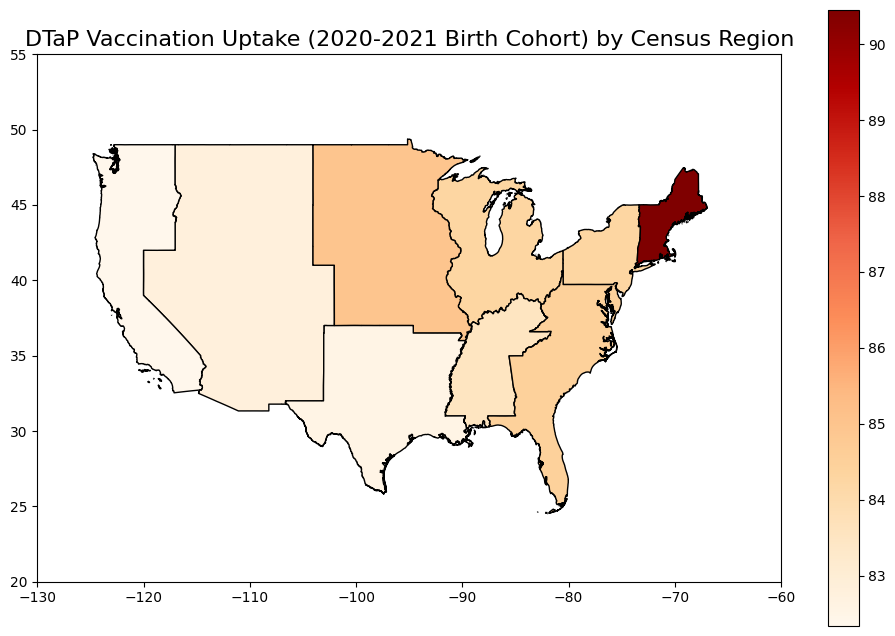

In [243]:
# Plot the choropleth map with black edges
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the map
merged.plot(
    column='Mean_Dtap_Uptake',  # Column to visualize
    cmap='OrRd',               # Colormap
    edgecolor='black',         # Black outline for regions
    legend=True,               # Show legend
    ax=ax                      # Axes object
)

# Add a title
plt.title("DTaP Vaccination Uptake (2020-2021 Birth Cohort) by Census Region", fontsize=16)

# Set axis limits for the contiguous U.S.
ax.set_xlim([-130, -60])
ax.set_ylim([20, 55])

# Show the map
plt.show()


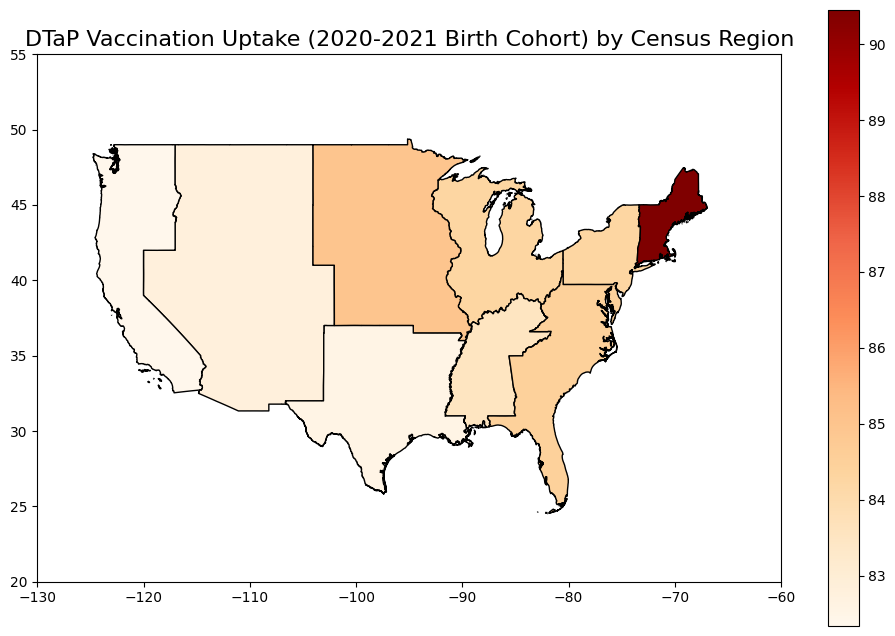

In [244]:
import matplotlib.pyplot as plt

# Plot the choropleth map with black edges
ax = merged.plot(
    column='Mean_Dtap_Uptake',  # Column for color-coding
    cmap='OrRd',               # Color map (e.g., 'viridis', 'Blues', 'OrRd')
    edgecolor='black',          # Set edge color to black
    legend=True,               # Show legend
    figsize=(12, 8)            # Size of the map
)

# Add a title
plt.title("DTaP Vaccination Uptake (2020-2021 Birth Cohort) by Census Region", fontsize=16)

# Set map bounds
ax.set_xlim([-130, -60])
ax.set_ylim([20, 55])

# Show the map
plt.show()


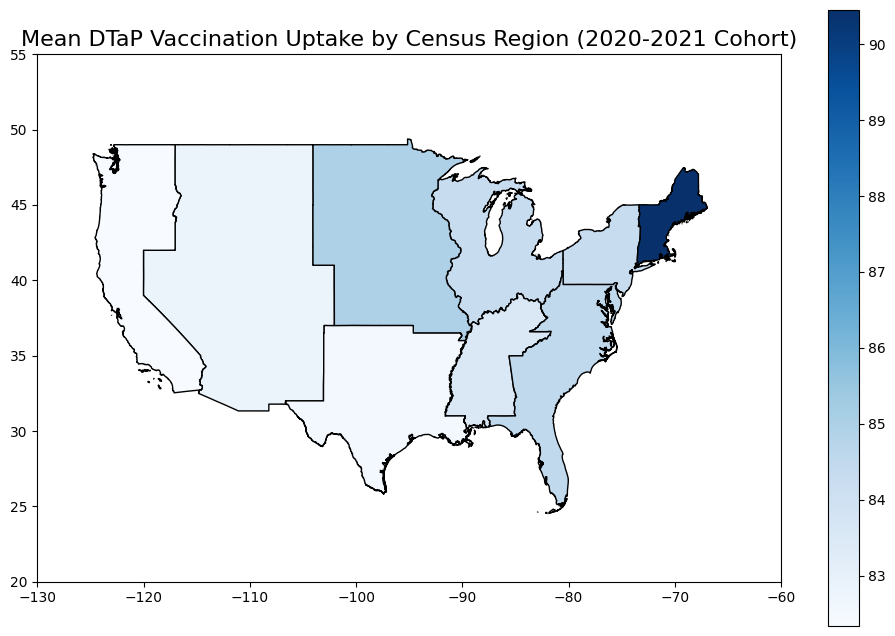

In [245]:


# Plot the visualization
fig, ax = plt.subplots(figsize=(12, 8))
plt.title(
    "Mean DTaP Vaccination Uptake by Census Region (2020-2021 Cohort)",
    fontsize=16,
)

# Plot the data with black outlines
merged.plot(
    column="Mean_Dtap_Uptake",  # Your column for visualization
    cmap="Blues",               # Colormap for shading
    legend=True,               # Add legend for color scale
    ax=ax,                     # Use the same axis
    edgecolor="black"          # Set outline color to black
)

# Set bounds for the contiguous U.S.
ax.set_xlim([-130, -60])  # Longitude for contiguous U.S.
ax.set_ylim([20, 55])     # Latitude for contiguous U.S.

# Show the map
plt.show()
